# <font style = "color:rgb(50,120,229)">Auto Focus Assignment</font>

Autofocus is implemented in all digital cameras these days. 

While using your phone camera, you may have noticed, the camera goes out of focus for a second or two, and the image looks blurry for a bit. The camera quickly performs some calculations and autofocuses to bring the subject in focus. 

In SLR cameras, autofocus is activated when we press the button half way through. You can see and hear parts of the lens moving as the camera tries to autofocus. 

Whether it is an SLR camera or your phone camera, autofocussing is done by taking a series of photos of the scene while changing the distance of the image sensor from the lens inside the camera.

In this assignment, we will find the sharpest image in a video squence of a static scene. In essence, we will do the computation necessary for autofocussing. 


In [25]:
# Import modules
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
import numpy as np
%matplotlib inline

In [26]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# <font style = "color:rgb(50,120,229)">Measures of Sharpness</font>

How do we know if an image is sharp? What is a good measure of sharpness?

As you can imagine, an out of focus image is smooth and does not have large gradient. So some function of the gradient (first derivative) of an image should help you. 

A different measure could be based on the second order derivative of the image called the Laplacian. 

In this assignment, you to have to read one paper and a section of another paper to figure out the sharpest image in a video sequence. 

1. [Diatom autofocusing in brightheld microscopy: a comparative study](https://decsai.ugr.es/vip/files/conferences/Autofocusing2000.pdf): This paper has several measures of sharpess. 

2. [Shape from Focus](https://graphics.stanford.edu/courses/cs348b-06/homework3/Nayar_CVPR92.pdf): This paper is about estimating the 3D shape of a scene using focus information. In Section 5, the author discusses a measure of focus. 

In the above papers, the focus is calculated over small windows. For our assignement, the focus measure needs to be calcualted over the entire image and not a small window. 





## <font style = "color:rgb(50,120,229)">Assignment Instructions</font>

In this assignment, you have to implement the following measures of focus:

1. **Variance of absolute values of Laplacian** - `var_abs_laplacian` function

2. **Sum Modified Laplacian (SML)** - `sum_modified_laplacian` function

You will also have to manually specify the ROI for the flower region in the frame so that instead of carrying out the auto focus measurement on the entire frame, it can be carried out only on the flower.

## <font style = "color:rgb(50,120,229)">Grading Rubric</font>

The assignment carries **30 marks** and the marks distribution is as follows.

1. Implementing *Variance of absolute values of Laplacian* method - **10 marks** (Autograded)
2. Implementing *Sum Modified Laplacian (SML)* method - **10 marks** (Autograded)
3. Overall submission - **10 marks** (Manually graded)

A total of **5 submissions** will be allowed.

## <font style = "color:rgb(50,120,229)">Important Functions</font>

Here are some important functions that you can use in this assignment.

1. [`cv2.filter2D`](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04): Convolves an image with the kernel. The function applies an arbitrary linear filter to an image.

2. [`cv2.Laplacian`](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6): Calculates the Laplacian of an image.


#### <font style = "color:rgb(200,0,0)">Note</font>
Please do not look for code online!  

<hr />

In [27]:
# Implement Variance of absolute values of Laplacian - Method 1
# Input: image
# Output: Floating point number denoting the measure of sharpness of image

# Do NOT change the function name and definition

def var_abs_laplacian(image):
    """
    Calculate the variance of the absolute values of the Laplacian of the image.

    Parameters:
    image (numpy.ndarray): Input image.

    Returns:
    float: Measure of sharpness of the image.
    """
    # Convert the image to grayscale if it is not already
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image
    
    # Compute the Laplacian of the image
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
    
    # Compute the absolute values of the Laplacian
    abs_laplacian = np.abs(laplacian)
    
    # Compute the variance of the absolute values of the Laplacian
    variance = np.var(abs_laplacian)
    
    return variance


In [28]:
# Implement Sum Modified Laplacian - Method 2
# Input: image
# Output: Floating point number denoting the measure of sharpness of image

# Do NOT change the function name and definition

def sum_modified_laplacian(im):
    """
    Calculate the sum of the modified Laplacian of the image.

    Parameters:
    im (numpy.ndarray): Input image.

    Returns:
    float: Measure of sharpness of the image.
    """
    # Convert the image to grayscale if it is not already
    if len(im.shape) == 3:
        gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = im
    
    # Compute the second derivatives
    M = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    Lx = cv2.filter2D(gray_image, cv2.CV_64F, M)
    Ly = cv2.filter2D(gray_image, cv2.CV_64F, M.T)
    
    # Compute the modified Laplacian
    modified_laplacian = np.abs(Lx) + np.abs(Ly)
    
    # Sum the modified Laplacian
    sharpness_measure = np.sum(modified_laplacian)
    
    return sharpness_measure

Let's have a look at the input video.

&nbsp;

<center>
<video controls width=800 src="https://www.dropbox.com/s/p3z0hbgo7sacqd1/focus-test.mp4?dl=1" type="video/mp4" />
</center>

Total number of frames : 186
Frame: 1, VAR_LAP: 3.639313, SML: 3146284
Frame ID of the best frame [Method 1]: 1
Frame ID of the best frame [Method 2]: 1
Frame: 1, VAR_LAP: 3.184045, SML: 3064406
Frame: 1, VAR_LAP: 3.528806, SML: 3187020
Frame ID of the best frame [Method 2]: 3
Frame: 1, VAR_LAP: 2.787853, SML: 2847886
Frame: 1, VAR_LAP: 3.443427, SML: 3072300
Frame: 1, VAR_LAP: 3.166335, SML: 3034354
Frame: 1, VAR_LAP: 3.290301, SML: 3055442
Frame: 1, VAR_LAP: 3.094230, SML: 3041372
Frame: 1, VAR_LAP: 3.858675, SML: 3351814
Frame ID of the best frame [Method 1]: 9
Frame ID of the best frame [Method 2]: 9
Frame: 1, VAR_LAP: 3.070468, SML: 3075688
Frame: 1, VAR_LAP: 3.285634, SML: 3151744
Frame: 1, VAR_LAP: 3.069197, SML: 3071316
Frame: 1, VAR_LAP: 3.830915, SML: 3386604
Frame ID of the best frame [Method 2]: 13
Frame: 1, VAR_LAP: 3.015128, SML: 3049958
Frame: 1, VAR_LAP: 3.295359, SML: 3124670
Frame: 1, VAR_LAP: 2.864049, SML: 3005008
Frame: 1, VAR_LAP: 3.725266, SML: 3359030
Frame: 1, 

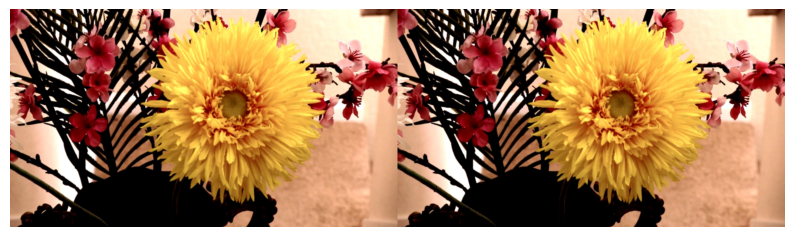

In [29]:
# Read input video filename
filename = DATA_PATH + 'videos/focus-test.mp4'

# Create a VideoCapture object
cap = cv2.VideoCapture(filename)

# Read first frame from the video
ret, frame = cap.read()

# Display total number of frames in the video
print("Total number of frames : {}".format(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

maxV1 = 0
maxV2 = 0

# Frame with maximum measure of focus
# Obtained using methods 1 and 2
bestFrame1 = 0 
bestFrame2 = 0 

# Frame ID of frame with maximum measure
# of focus
# Obtained using methods 1 and 2
bestFrameId1 = 0 
bestFrameId2 = 0 

# Specify the ROI for flower in the frame
# UPDATE THE VALUES BELOW
top = 0
left = 0
bottom = frame.shape[0]
right = frame.shape[1]

# Iterate over all the frames present in the video
while(ret):
    # Crop the flower region out of the frame
    flower = frame[top:bottom, left:right]
    # Get measures of focus from both methods = 1
    frame_id = 1
    val1 = var_abs_laplacian(flower)
    val2 = sum_modified_laplacian(flower) 
    print("Frame: %d, VAR_LAP: %f, SML: %d" % (frame_id,val1,val2))
    
    # If the current measure of focus is greater 
    # than the current maximum
    if val1 > maxV1 :
        # Revise the current maximum
        maxV1 = val1
        # Get frame ID of the new best frame
        bestFrameId1 = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        # Revise the new best frame
        bestFrame1 = frame.copy()
        print("Frame ID of the best frame [Method 1]: {}".format(bestFrameId1))

    # If the current measure of focus is greater 
    # than the current maximum
    if val2 > maxV2 : 
        # Revise the current maximum
        maxV2 = val2
        # Get frame ID of the new best frame
        bestFrameId2 = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        # Revise the new best frame
        bestFrame2 = frame.copy()
        print("Frame ID of the best frame [Method 2]: {}".format(bestFrameId2))
        
    # Read a new frame
    ret, frame = cap.read()


print("================================================")
# Print the Frame ID of the best frame
print("Frame ID of the best frame [Method 1]: {}".format(bestFrameId1))
print("Frame ID of the best frame [Method 2]: {}".format(bestFrameId2))

# Release the VideoCapture object
cap.release()

# Stack the best frames obtained using both methods
out = np.hstack((bestFrame1, bestFrame2))

# Display the stacked frames
plt.figure()
plt.imshow(out[:,:,::-1]);
plt.axis('off');

In [30]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [31]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# <font style = "color:rgb(50,120,229)">Additional Exercise</font>

In this assignment you implemented 2 of the several measures of focus. Now, try to implement the rest of the measures of focus and see if your output matches the output you obtained using the above 2 methods. 

Which method do you think is the best one and why? Share your answers on the discussion forum.

---

# Finding the Best Image for Autofocus

So far in this assignment, we aim to find the sharpest image in a video sequence of a static scene, which is essential for implementing autofocus in digital cameras. Autofocus is achieved by taking a series of photos while changing the distance of the image sensor from the lens and selecting the sharpest image.

## Measures of Sharpness
### Variance of Absolute Values of Laplacian
The variance of the absolute values of the Laplacian of an image is a common measure of sharpness. The Laplacian operator highlights regions of rapid intensity change, and the variance of its absolute values indicates the degree of focus.

### Sum Modified Laplacian (SML)
The Sum Modified Laplacian method computes the sum of the absolute values of the second derivatives of the image. This method captures the sharpness by emphasizing the edges and fine details in the image.

---
## Looking into alternative Measures of Sharpness

### Variance of the Image
The variance of the pixel intensities in the image can be used as a measure of sharpness. Higher variance indicates a sharper image as it reflects greater intensity differences.

### Tenengrad Method
This method uses the gradient magnitude of the image, computed using the Sobel operator. The sharpness is measured as the sum of the squared gradient magnitudes, highlighting the edges and details.

### Brenner's Focus Measure
Brenner's Focus Measure computes the difference between pixel values that are a certain distance apart. The sum of the squared differences is used as the focus measure, indicating the sharpness of the image.

### Energy of the Image
The energy of the image is computed using the sum of the squared pixel intensities. Higher energy indicates a sharper image as it reflects more significant intensity variations.

### Gray Level Co-occurrence Matrix (GLCM)
The GLCM can be used to compute texture features such as contrast, correlation, energy, and homogeneity. These features can serve as measures of sharpness, with higher contrast and energy indicating a sharper image.

### FFT-based Sharpness Measure
The Fast Fourier Transform (FFT) analyzes the frequency components of the image. The presence of high-frequency components indicates a sharper image, as sharp images contain more high-frequency details.

By implementing and comparing these measures, we can determine the sharpest image in a video sequence, thereby achieving effective autofocus.


In [32]:
# Variance of the Image
def variance_of_image(image):
    """
    Calculate the variance of the pixel intensities of the image.

    Parameters:
    image (numpy.ndarray): Input image.

    Returns:
    float: Measure of sharpness of the image.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    variance = np.var(gray_image)
    return variance

# Tenengrad Method
def tenengrad(image):
    """
    Calculate the Tenengrad measure of sharpness of the image.

    Parameters:
    image (numpy.ndarray): Input image.

    Returns:
    float: Measure of sharpness of the image.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
    sharpness_measure = np.sum(gradient_magnitude**2)
    return sharpness_measure

# Brenner's Focus Measure
def brenner(image):
    """
    Calculate the Brenner's Focus Measure of sharpness of the image.

    Parameters:
    image (numpy.ndarray): Input image.

    Returns:
    float: Measure of sharpness of the image.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    brenner_measure = np.sum(np.diff(gray_image, axis=0)**2)
    return brenner_measure

# Energy of the Image
def energy_of_image(image):
    """
    Calculate the energy of the image.

    Parameters:
    image (numpy.ndarray): Input image.

    Returns:
    float: Measure of sharpness of the image.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    energy_measure = np.sum(gray_image**2)
    return energy_measure

# Gray Level Co-occurrence Matrix (GLCM)
def glcm_contrast(image):
    """
    Calculate the contrast measure using GLCM of the image.

    Parameters:
    image (numpy.ndarray): Input image.

    Returns:
    float: Measure of sharpness of the image.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = cv2.imgproc.glcm(gray_image, [0], 1, symmetric=True, normed=True)
    contrast = cv2.imgproc.glcm_desc(glcm, 'CONTRAST')
    return contrast

# FFT-based Sharpness Measure
def fft_sharpness(image):
    """
    Calculate the sharpness measure using FFT of the image.

    Parameters:
    image (numpy.ndarray): Input image.

    Returns:
    float: Measure of sharpness of the image.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(gray_image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    sharpness_measure = np.sum(magnitude_spectrum)
    return sharpness_measure

# Custom Tenengrad Method using cv2.filter2D
def tenengrad_with_filter2D(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Define Sobel kernels
    sobel_x_kernel = np.array([[-1, 0, 1], 
                               [-2, 0, 2], 
                               [-1, 0, 1]])
    
    sobel_y_kernel = np.array([[-1, -2, -1], 
                               [ 0,  0,  0], 
                               [ 1,  2,  1]])
    
    # Apply Sobel filters using cv2.filter2D
    sobel_x = cv2.filter2D(gray_image, cv2.CV_64F, sobel_x_kernel)
    sobel_y = cv2.filter2D(gray_image, cv2.CV_64F, sobel_y_kernel)
    
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    sharpness_measure = np.sum(gradient_magnitude)
    return sharpness_measure

Total number of frames : 186
Frame: 1, VAR_LAP: 3.639313, SML: 3146284, VAR: 5505.311665, TEN: 276781060.000000, BRE: 2670382.000000, ENE: 89849252.000000, FFT: 117794012.300806, TEN_F2D: 11001686.503716
Frame: 2, VAR_LAP: 3.184045, SML: 3064406, VAR: 5512.041185, TEN: 272939322.000000, BRE: 2576986.000000, ENE: 89893899.000000, FFT: 117175978.506803, TEN_F2D: 10922024.608893
Frame: 3, VAR_LAP: 3.528806, SML: 3187020, VAR: 5498.741531, TEN: 271637144.000000, BRE: 2620289.000000, ENE: 89578548.000000, FFT: 117912019.629013, TEN_F2D: 10923887.088005
Frame: 4, VAR_LAP: 2.787853, SML: 2847886, VAR: 5408.578588, TEN: 219985606.000000, BRE: 2070859.000000, ENE: 90665574.000000, FFT: 115599936.302083, TEN_F2D: 9921262.421081
Frame: 5, VAR_LAP: 3.443427, SML: 3072300, VAR: 5350.204295, TEN: 204480516.000000, BRE: 2063875.000000, ENE: 90621370.000000, FFT: 116997249.618454, TEN_F2D: 9671049.848882
Frame: 6, VAR_LAP: 3.166335, SML: 3034354, VAR: 5340.986700, TEN: 201855376.000000, BRE: 2009497.0

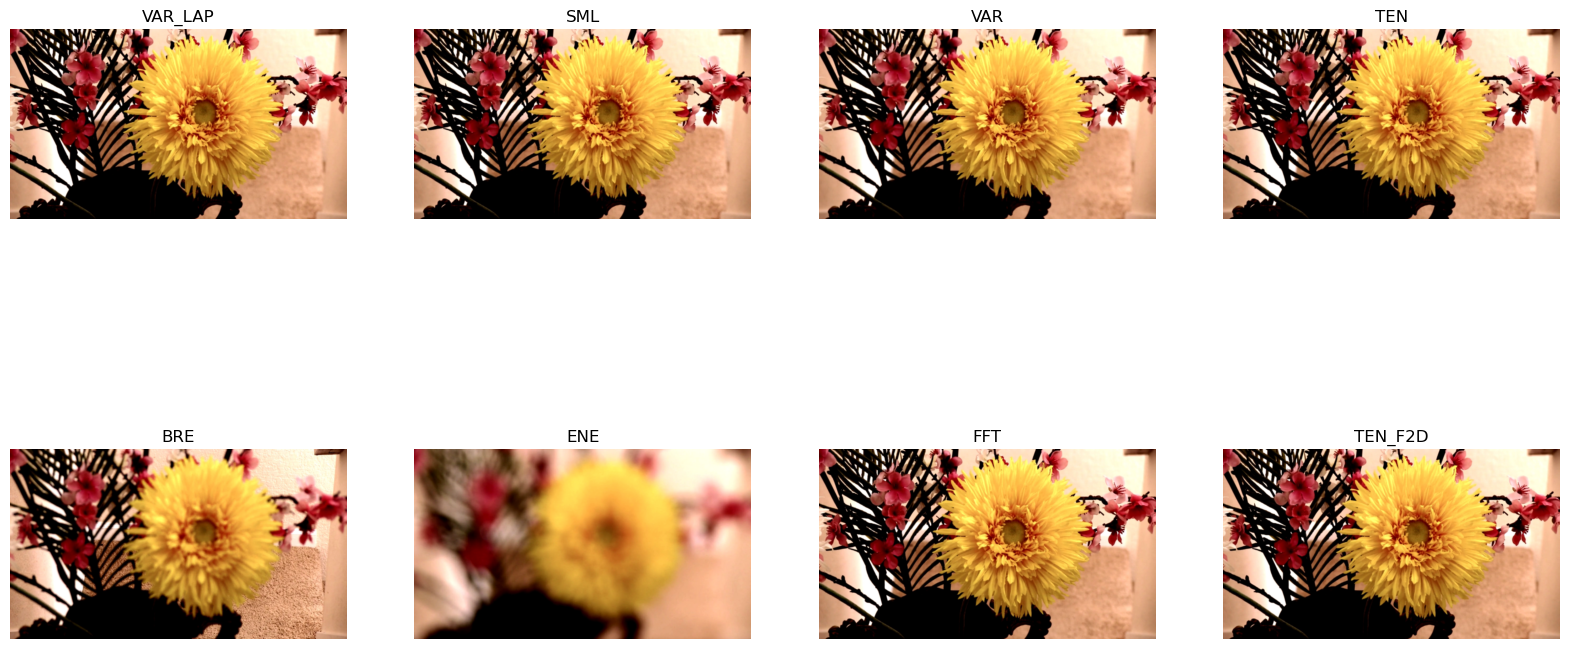

In [33]:
# Read input video filename
filename = DATA_PATH + 'videos/focus-test.mp4'

# Create a VideoCapture object
cap = cv2.VideoCapture(filename)

# Read first frame from the video
ret, frame = cap.read()

# Display total number of frames in the video
print("Total number of frames : {}".format(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

# Initialize variables to store the maximum focus measures and corresponding frames
maxV1 = maxV2 = maxV3 = maxV4 = maxV5 = maxV6 = maxV7 = maxV8 = 0
bestFrame1 = bestFrame2 = bestFrame3 = bestFrame4 = bestFrame5 = bestFrame6 = bestFrame7 = bestFrame8 = None
bestFrameId1 = bestFrameId2 = bestFrameId3 = bestFrameId4 = bestFrameId5 = bestFrameId6 = bestFrameId7 = bestFrameId8 = 0

# Specify the ROI for flower in the frame
# UPDATE THE VALUES BELOW
top = 0
left = 0
bottom = frame.shape[0]
right = frame.shape[1]

# Iterate over all the frames present in the video
while ret:
    # Crop the flower region out of the frame
    flower = frame[top:bottom, left:right]
    
    # Get measures of focus from all methods
    val1 = var_abs_laplacian(flower)
    val2 = sum_modified_laplacian(flower)
    val3 = variance_of_image(flower)
    val4 = tenengrad(flower)
    val5 = brenner(flower)
    val6 = energy_of_image(flower)
    val7 = fft_sharpness(flower)
    val8 = tenengrad_with_filter2D(flower)
    
    frame_id = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
    print("Frame: %d, VAR_LAP: %f, SML: %d, VAR: %f, TEN: %f, BRE: %f, ENE: %f, FFT: %f, TEN_F2D: %f" % (frame_id, val1, val2, val3, val4, val5, val6, val7, val8))
    
    # Update the best frame for each method
    if val1 > maxV1:
        maxV1 = val1
        bestFrameId1 = frame_id
        bestFrame1 = frame.copy()
    
    if val2 > maxV2:
        maxV2 = val2
        bestFrameId2 = frame_id
        bestFrame2 = frame.copy()
    
    if val3 > maxV3:
        maxV3 = val3
        bestFrameId3 = frame_id
        bestFrame3 = frame.copy()
    
    if val4 > maxV4:
        maxV4 = val4
        bestFrameId4 = frame_id
        bestFrame4 = frame.copy()
    
    if val5 > maxV5:
        maxV5 = val5
        bestFrameId5 = frame_id
        bestFrame5 = frame.copy()
    
    if val6 > maxV6:
        maxV6 = val6
        bestFrameId6 = frame_id
        bestFrame6 = frame.copy()
    
    if val7 > maxV7:
        maxV7 = val7
        bestFrameId7 = frame_id
        bestFrame7 = frame.copy()
    
    if val8 > maxV8:
        maxV8 = val8
        bestFrameId8 = frame_id
        bestFrame8 = frame.copy()
    
    # Read a new frame
    ret, frame = cap.read()

print("================================================")
# Print the Frame ID of the best frame for each method
print("Frame ID of the best frame [Method 1 - VAR_LAP]: {}".format(bestFrameId1))
print("Frame ID of the best frame [Method 2 - SML]: {}".format(bestFrameId2))
print("Frame ID of the best frame [Method 3 - VAR]: {}".format(bestFrameId3))
print("Frame ID of the best frame [Method 4 - TEN]: {}".format(bestFrameId4))
print("Frame ID of the best frame [Method 5 - BRE]: {}".format(bestFrameId5))
print("Frame ID of the best frame [Method 6 - ENE]: {}".format(bestFrameId6))
print("Frame ID of the best frame [Method 7 - FFT]: {}".format(bestFrameId7))
print("Frame ID of the best frame [Method 8 - TEN_F2D]: {}".format(bestFrameId8))

# Release the VideoCapture object
cap.release()

# Display the best frames obtained using all methods
methods = ['VAR_LAP', 'SML', 'VAR', 'TEN', 'BRE', 'ENE', 'FFT', 'TEN_F2D']
best_frames = [bestFrame1, bestFrame2, bestFrame3, bestFrame4, bestFrame5, bestFrame6, bestFrame7, bestFrame8]

plt.figure(figsize=(20, 10))
for i, (frame, method) in enumerate(zip(best_frames, methods)):
    plt.subplot(2, 4, i+1)
    plt.imshow(frame[:,:,::-1])
    plt.title(method)
    plt.axis('off')
plt.show()

The `ENE (Energy of the Image)` method calculates the sum of the squared pixel intensities. This method might not be as effective for measuring sharpness because it doesn't directly account for edges or high-frequency components, which are more indicative of sharpness. Instead, it measures the overall intensity, which can be influenced by factors like brightness and contrast rather than sharpness.

To improve the effectiveness of the ENE method, you might consider normalizing the image or focusing on high-frequency components. However, other methods like VAR_LAP, SML, TEN, and FFT are generally more reliable for measuring sharpness because they directly analyze edges and high-frequency details.

As suggested, for pre-processing lets use the [`cv2.filter2D`](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04): Convolves an image with the kernel. The function applies an arbitrary linear filter to an image.

Total number of frames : 186
Frame: 1, ENE: 276781060.000000
Frame: 2, ENE: 272939322.000000
Frame: 3, ENE: 271637144.000000
Frame: 4, ENE: 219985606.000000
Frame: 5, ENE: 204480516.000000
Frame: 6, ENE: 201855376.000000
Frame: 7, ENE: 263097850.000000
Frame: 8, ENE: 268916954.000000
Frame: 9, ENE: 243151594.000000
Frame: 10, ENE: 225107130.000000
Frame: 11, ENE: 226139364.000000
Frame: 12, ENE: 237997864.000000
Frame: 13, ENE: 230936528.000000
Frame: 14, ENE: 201130974.000000
Frame: 15, ENE: 201818182.000000
Frame: 16, ENE: 205717584.000000
Frame: 17, ENE: 214413400.000000
Frame: 18, ENE: 183543302.000000
Frame: 19, ENE: 174652038.000000
Frame: 20, ENE: 169866370.000000
Frame: 21, ENE: 177561142.000000
Frame: 22, ENE: 165187878.000000
Frame: 23, ENE: 162652770.000000
Frame: 24, ENE: 169597280.000000
Frame: 25, ENE: 172412116.000000
Frame: 26, ENE: 175160728.000000
Frame: 27, ENE: 163153660.000000
Frame: 28, ENE: 162246710.000000
Frame: 29, ENE: 169060596.000000
Frame: 30, ENE: 1672621

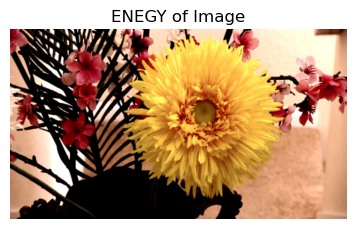

In [34]:
def energy_of_image(image):
    """
    Calculate the energy of the edges of the image using cv2.filter2D with Sobel filters.

    Parameters:
    image (numpy.ndarray): Input image.

    Returns:
    float: Measure of sharpness of the image.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Define Sobel kernels
    sobel_x_kernel = np.array([[-1, 0, 1], 
                               [-2, 0, 2], 
                               [-1, 0, 1]])
    
    sobel_y_kernel = np.array([[-1, -2, -1], 
                               [ 0,  0,  0], 
                               [ 1,  2,  1]])
    
    # Apply Sobel filters using cv2.filter2D
    sobel_x = cv2.filter2D(gray_image, cv2.CV_64F, sobel_x_kernel)
    sobel_y = cv2.filter2D(gray_image, cv2.CV_64F, sobel_y_kernel)
    
    # Calculate the gradient magnitude
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    
    # Calculate the energy of the edges
    energy = np.sum(gradient_magnitude**2)
    
    return energy

# Read input video filename
filename = DATA_PATH + 'videos/focus-test.mp4'

# Create a VideoCapture object
cap = cv2.VideoCapture(filename)

# Read first frame from the video
ret, frame = cap.read()

# Display total number of frames in the video
print("Total number of frames : {}".format(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

# Initialize variables to store the maximum focus measures and corresponding frames
maxV =  0
bestFrame = None
bestFrameId = 0

# Specify the ROI for flower in the frame
# UPDATE THE VALUES BELOW
top = 0
left = 0
bottom = frame.shape[0]
right = frame.shape[1]

# Iterate over all the frames present in the video
while ret:
    # Crop the flower region out of the frame
    flower = frame[top:bottom, left:right]
    
    # Get measures of focus
    val = energy_of_image(flower)
    
    frame_id = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
    print("Frame: %d, ENE: %f" % (frame_id, val))
    
    # Update the best frame for each method
    if val > maxV:
        maxV = val
        bestFrameId = frame_id
        bestFrame = frame.copy()
    
    
    # Read a new frame
    ret, frame = cap.read()

print("================================================")
# Print the Frame ID of the best frame for each method
print("Frame ID of the best frame [Method  - ENE]: {}".format(bestFrameId))

# Release the VideoCapture object
cap.release()

# Display the best frames obtained using all methods
methods = ['ENEGY of Image']
best_frames = [bestFrame]

plt.figure(figsize=(20, 10))
for i, (frame, method) in enumerate(zip(best_frames, methods)):
    plt.subplot(2, 4, i+1)
    plt.imshow(frame[:,:,::-1])
    plt.title(method)
    plt.axis('off')
plt.show()

## DISCUSSION
---
### Why Using `cv2.filter2D` Improved the Result of the Energy of Image Method ?

The `Energy of the Image` method calculates the sum of the squared pixel intensities to measure the sharpness of an image. However, this approach might not be very effective because it does not directly account for edges or high-frequency components, which are more indicative of sharpness. Instead, it measures the overall intensity, which can be influenced by factors like brightness and contrast rather than sharpness.

By incorporating the `cv2.filter2D` function with Sobel filters, we can enhance the effectiveness of the `Energy of the Image` method. The Sobel filters are used to compute the gradient of the image, which highlights the edges and fine details. The gradient magnitude is then calculated, and its energy is measured by summing the squared gradient magnitudes.

This approach improves the sharpness measurement because it focuses on the edges and high-frequency components of the image, which are more relevant indicators of sharpness. By emphasizing these features, the modified `Energy of the Image` method provides a more accurate assessment of the image sharpness, leading to better results in identifying the sharpest frame in a video sequence.
